In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.functions import main_cleaning

# %load_ext autoreload
# %autoreload 2

# Load data
file_path = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
# file_path = r'C:\Users\pablo\vscode101\Project_Files\GSAF5.xls'
df = pd.read_excel(file_path)

# Quick look at columns and missingness
display(df.info())
# Display the first few rows
# df.info()
# df.dtypes
# df.nunique()
# df.describe()
# display(df.isna().sum())
# display((df.isna().sum()/df.shape[0])*100)
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7045 non-null   object 
 1   Year            7043 non-null   float64
 2   Type            7027 non-null   object 
 3   Country         6995 non-null   object 
 4   State           6560 non-null   object 
 5   Location        6478 non-null   object 
 6   Activity        6460 non-null   object 
 7   Name            6826 non-null   object 
 8   Sex             6466 non-null   object 
 9   Age             4051 non-null   object 
 10  Injury          7010 non-null   object 
 11  Fatal Y/N       6484 non-null   object 
 12  Time            3519 non-null   object 
 13  Species         3914 non-null   object 
 14  Source          7025 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

None

In [27]:
# Where is the best market for surfing insurance?
top_country = df['Country'].value_counts().idxmax()
print(f"Best market: {top_country}")

# Which states/beaches are highest risk?
top_state = df[df['Country'] == top_country]['State'].value_counts().idxmax()
print(f"In {top_country}, highest risk state: {top_state}")

Best market: USA
In USA, highest risk state: Florida


In [28]:
# Find the Top 10 Countries by Shark Attacks?
def attacks_top10_countries(df: pd.DataFrame) -> pd.DataFrame:
    country_counts = df.groupby('Country').size().reset_index(name='Attack_Count') # Group by Country and count attacks
    country_counts = country_counts.sort_values(by='Attack_Count', ascending=False) # Sort in descending order
    top10 = country_counts.head(10).reset_index(drop=True) # Select only the top 10
    return top10

display(attacks_top10_countries(df))

,Country,Attack_Count
0,USA,2572
1,AUSTRALIA,1481
2,SOUTH AFRICA,597
3,NEW ZEALAND,144
4,PAPUA NEW GUINEA,136
5,BAHAMAS,136
6,BRAZIL,122
7,MEXICO,103
8,ITALY,72
9,FIJI,67


In [29]:
# Call function to clea
df_surf = main_cleaning(df)

In [30]:
df_surf

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal_Y/N,Time,Species
0,NaT,2025,Unprovoked,AUSTRALIA,Nsw,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y,0930hrs,Great White Shark
1,NaT,2025,Unprovoked,AUSTRALIA,Nsw,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White
2,NaT,2025,Unprovoked,AUSTRALIA,Nsw,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White
3,NaT,2025,Unprovoked,CANARY ISLANDS,Fuerteventura,Los Mollinas,Surfing (Hydrofoiling),Unknown,M,?,Lacerations to left leg above the knee,N,PM,Undetermined
4,NaT,2025,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,18,Lacerations to left foot,N,1150hrs,Undetermined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,NaT,1910,Unprovoked,AUSTRALIA,Western Australia,Bunbury,Surf bathing,George Cridland,M,NaN,"Shoulder, back & leg bitten",N,Night,5.5' to 6' shark
1423,NaT,1842,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,male,M,7 or 8,FATAL,Y,NaN,NaN
1424,NaT,1828,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,NaN,FATAL,Y,NaN,NaN
1425,NaT,1779,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,"FATAL, buttock lacerated",Y,NaN,NaN


In [31]:
# Save Cleaned Data to CSV
df_surf.to_csv('cleaned_data_df_surf.csv', index=False)

In [32]:
def attacks_pivot(df: pd.DataFrame) -> pd.DataFrame:
    # Filter only for USA and Australia
    df_filtered = df[df['Country'].isin(['USA', 'AUSTRALIA'])].copy()
    
    # Group by Country, State, Beach and count attacks
    pivot = df_filtered.groupby(['Country', 'State']).size().reset_index(name='Attack_Count')

    # Sort by Attack_Count descending for risk ranking
    pivot = pivot.sort_values(by='Attack_Count', ascending=False).reset_index(drop=True)

    return pivot

display(attacks_pivot(df_surf))

,Country,State,Attack_Count
0,USA,Florida,476
1,AUSTRALIA,New South Wales,156
2,USA,California,118
3,USA,Hawaii,98
4,AUSTRALIA,Western Australia,53
5,AUSTRALIA,South Australia,34
6,USA,North Carolina,32
7,AUSTRALIA,Queensland,30
8,USA,Oregon,30
9,AUSTRALIA,Victoria,28


In [33]:
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')
pivot_table = sex_country_counts.pivot(index="Country", columns="Sex", values="AttackCount").fillna(0)
display(pivot_table)

Sex,F,M
Country,,
AUSTRALIA,16,299
USA,72,718


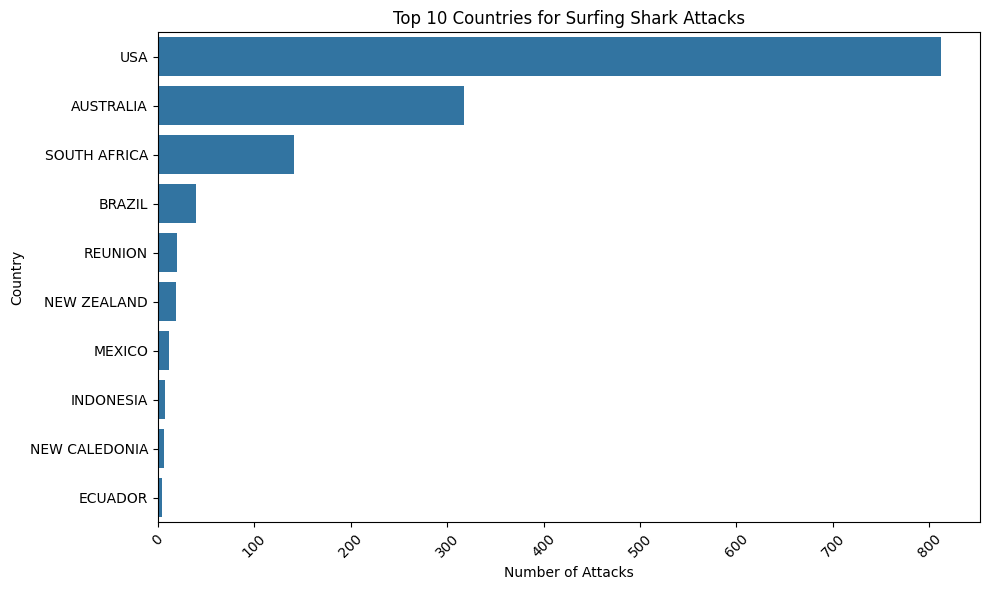

In [34]:
# --- 10 Top Countries More Surfing Attacks ---

plt.figure(figsize=(10,6))
top_countries = df_surf['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries for Surfing Shark Attacks")
plt.ylabel("Country")
plt.xlabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

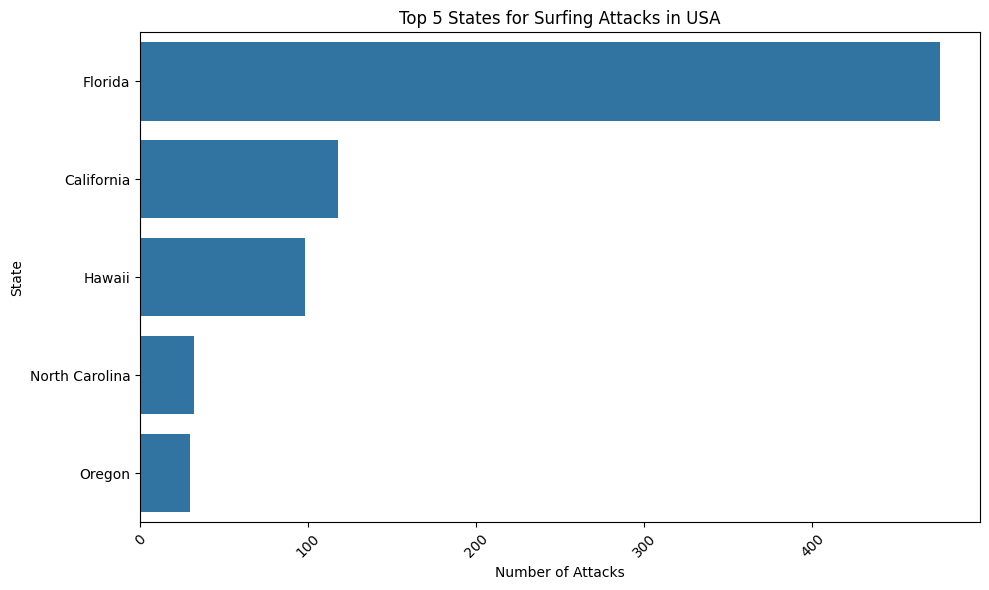

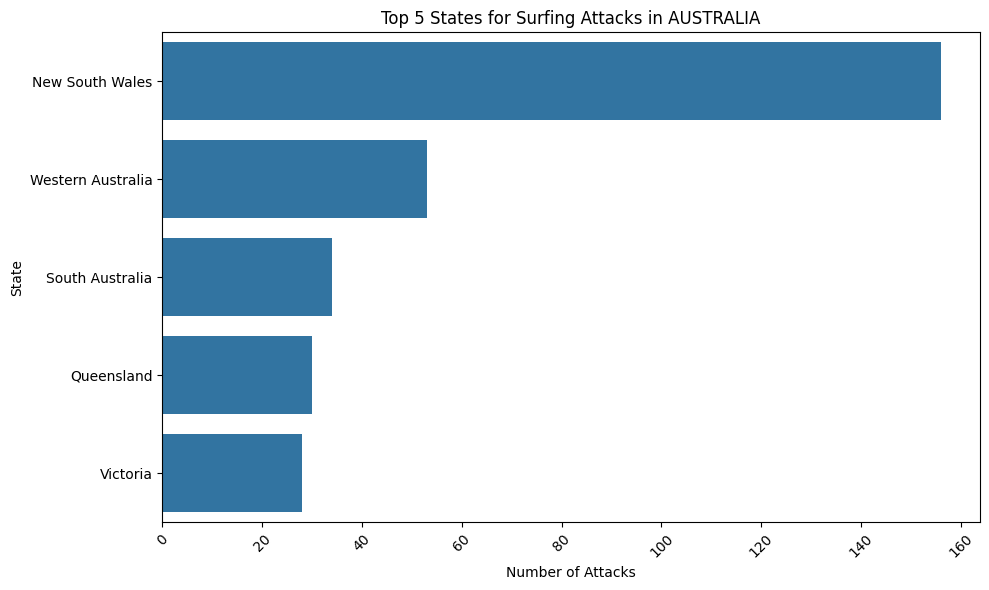

In [35]:
# --- Top states for US and Australia ---
for country in ['USA', 'AUSTRALIA']:
    plt.figure(figsize=(10,6))
    top_states = df_surf[df_surf['Country'] == country]['State'].value_counts().head(5)
    sns.barplot(y=top_states.index, x=top_states.values)
    plt.title(f"Top 5 States for Surfing Attacks in {country}")
    plt.ylabel("State")
    plt.xlabel("Number of Attacks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

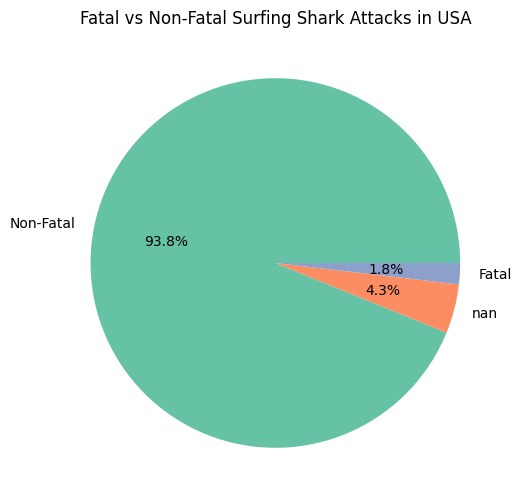

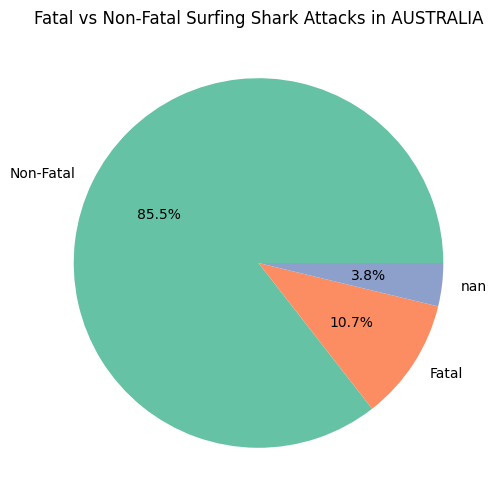

In [36]:
# --- Fatal vs Non-Fatal surfing attacks in USA and ASUTRALIA ---

for country in ['USA', 'AUSTRALIA']:
    country_surf = df_surf[df_surf['Country'] == country]
    # Get counts of fatal vs non-fatal
    fatal_counts_usa = country_surf ['Fatal_Y/N'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(fatal_counts_usa, 
            labels=fatal_counts_usa.index.map({'N': 'Non-Fatal', 'Y': 'Fatal'}),
            autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'))
    plt.title(f'Fatal vs Non-Fatal Surfing Shark Attacks in {country}')
    plt.show()

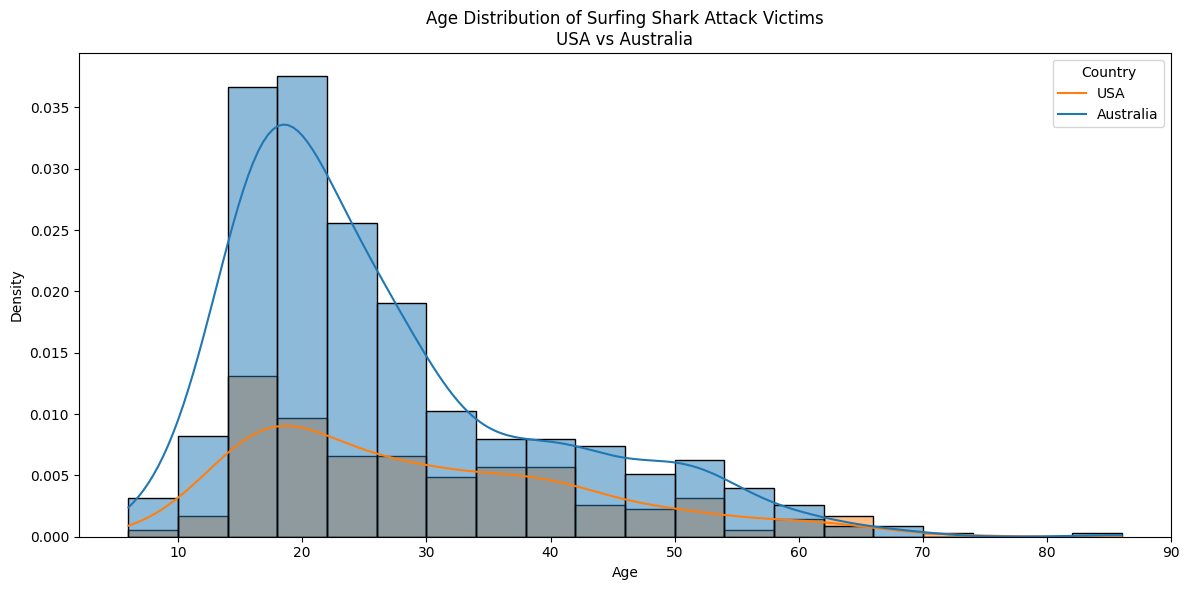

USA - Mean Age: 26.4953560371517 Std Dev: 12.629698362421575
Australia - Mean Age: 29.566523605150216 Std Dev: 13.526668882331752


In [37]:
# --- Distribution and Deviation (standard deviation) of age victims in both the USA and Australia  ---

# Ensure Age column is numeric and drop NaNs
df_surf['Age'] = pd.to_numeric(df_surf['Age'], errors='coerce')

# Filter for USA and Australia only, drop missing ages
df_usa = df_surf[(df_surf['Country'] == 'USA') & (df_surf['Age'].notnull())].copy()
df_aus = df_surf[(df_surf['Country'] == 'AUSTRALIA') & (df_surf['Age'].notnull())].copy()

# Prepare data for plotting
df_usa.loc[:, 'Country'] = 'USA'
df_aus.loc[:, 'Country'] = 'Australia'
df_age = pd.concat([df_usa[['Age','Country']], df_aus[['Age','Country']]])

# Plot distribution and standard deviation
plt.figure(figsize=(12,6))
sns.histplot(data=df_age, x='Age', hue='Country', bins=20, stat='density', kde=True, alpha=0.5)
plt.title('Age Distribution of Surfing Shark Attack Victims\nUSA vs Australia')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Country', labels=['USA', 'Australia'])
plt.tight_layout()
plt.show()

# Print basic stats for context
print("USA - Mean Age:", df_usa['Age'].mean(), "Std Dev:", df_usa['Age'].std())
print("Australia - Mean Age:", df_aus['Age'].mean(), "Std Dev:", df_aus['Age'].std())

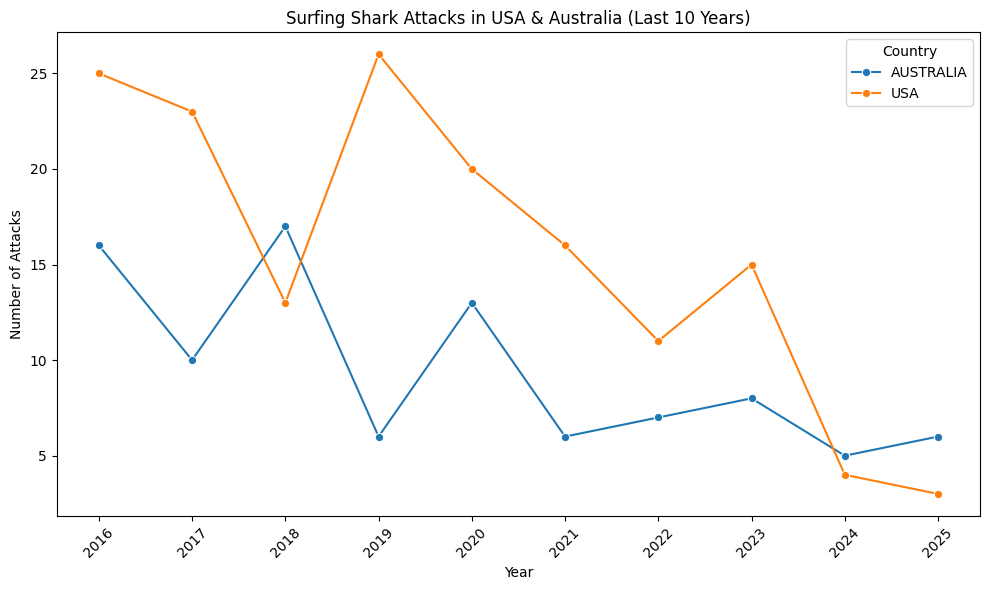

In [38]:
# --- Trend of surfing shark attacks in the last 10 years in USA and AUSTRALIA ---
# Filter for USA and Australia attacks
recent_years = sorted(df_surf['Year'].dropna().unique())[-10:]  # get last 10 years
df_recent = df_surf[df_surf['Year'].isin(recent_years) & df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by year and country
trend_df = df_recent.groupby(['Year', 'Country']).size().reset_index(name='Attacks')

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_df, x='Year', y='Attacks', hue='Country', marker='o')
plt.title('Surfing Shark Attacks in USA & Australia (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(recent_years, rotation=45)
plt.tight_layout()
plt.show()

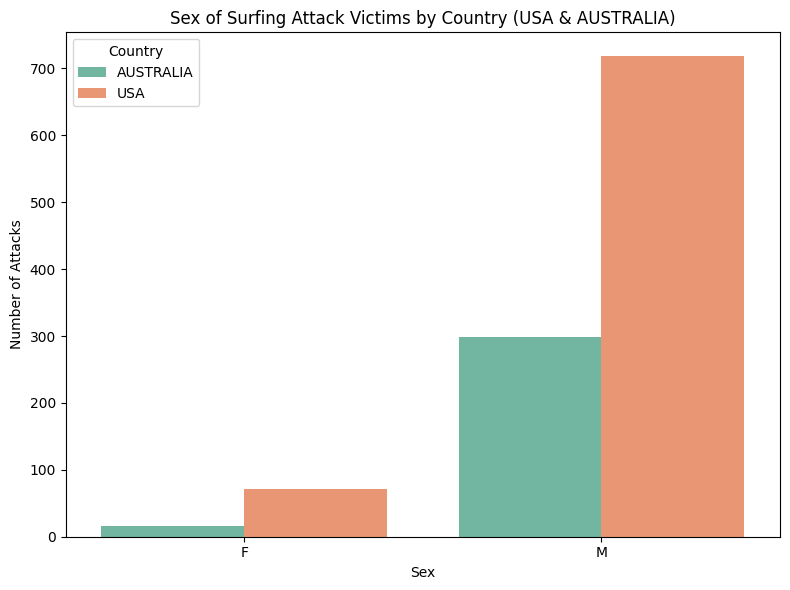

In [39]:
# Filter only USA and AUSTRALIA
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')

# Draw grouped barplot
plt.figure(figsize=(8,6))
sns.barplot(data=sex_country_counts, x='Sex', y='AttackCount', hue='Country', palette="Set2")
plt.title("Sex of Surfing Attack Victims by Country (USA & AUSTRALIA)")
plt.xlabel("Sex")
plt.ylabel("Number of Attacks")
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [40]:
# - Country/state/beach risk rankings

def surfing_risk_score(country, state, age, sex):
    score = 0
    if country.upper() in ['USA', 'AUSTRALIA']:
        score += 2
    if state.title() in ['Florida', 'Nsw']:
        score += 2
    if sex == 'M':
        score += 1
    if age and 15 <= age <= 40:
        score += 1
    return score

In [41]:
country = input("Enter country: ")
state = input("Enter state: ")
sex = input("Enter sex (M/F): ")
age = input("Enter age: ")

# Convert age to int, but leave sex as string
age = int(age)

score = surfing_risk_score(country, state, age, sex)
print(score)

Enter country:  australia
Enter state:  nsw
Enter sex (M/F):  M
Enter age:  25


6
